<a href="https://colab.research.google.com/github/speznik/multivariate_kalman_filter/blob/main/Simple-Static-System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kalman Filter for One-dimensional Static Systems


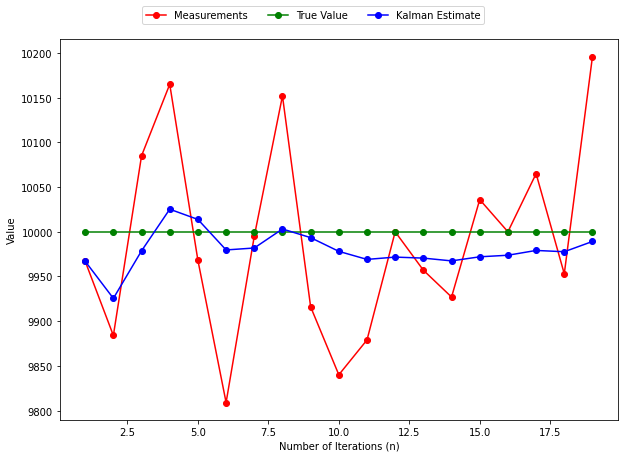

In [1]:
from IPython.core.display import clear_output
import math
import random
import numpy
import matplotlib.pyplot as plt

# Generating Array of measurements
def measurement_generator(n, z):
    out = []
    for i in range(z):
        rand = random.randint(-1*int(0.02*n), int(0.02*n))
        out.append(int(rand+n))
    return out

true_value = 10000
initial_guess = 10010
state_estimate = initial_guess
predicted_state = initial_guess
n = 20 # Number of Iterations
n1 = 1


# Initializing value arrays for plotting
true_list = []
state_list = []
measures = []
measurements = measurement_generator(true_value, n)
num_list = []

# Array of true values against nth iteration
# for i in range(n):
#     true_list.append(true_value)

while(n1 < n):

    clear_output()

    num_list.append(n1)
    measures = measurements[:n1] # To be replaced with actual measurments updated with every iteration
    true_list.append(true_value)

    # Kalman Estimation Algorithm for Static System
    kalman_gain = 1/n1
    state_estimate = predicted_state + kalman_gain*(measures[n1-1] - predicted_state)
    predicted_state = state_estimate
    state_list.append(state_estimate)

    # print("Measurements: ", measures)
    # print("Kalman State Estimates: ", state_list)
    # print("True Values: ", true_list)

    n1+=1

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

plt.plot(num_list, measures, '-ro', label = 'Measurements')
plt.plot(num_list, true_list, '-go', label = 'True Value')
plt.plot(num_list, state_list, '-bo', label = 'Kalman Estimate')
plt.xlabel('Number of Iterations (n)')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(0.77, 1.1), ncol=3)